1. Create a connection to an SQLite database file named student_grades.db. If the
database file does not exist, SQLite will automatically create it.
2. Create a cursor object to interact with the database.

In [53]:
import sqlite3

connection = sqlite3.connect('dbs/student_grades.db')
cursor = connection.cursor()

2. Create the Necessary Tables
You will need two tables for this assignment:

**students**: A table to store student information.

**grades**: A table to store student grades for different subjects.

The structure of the tables should be as follows:


students table:
- student_id (INTEGER, Primary Key, Auto-increment)
- first_name (TEXT)
- last_name (TEXT)
  
grades table:
- grade_id (INTEGER, Primary Key, Auto-increment)
- student_id (INTEGER, Foreign Key linked to students table)
- subject (TEXT)
- grade (INTEGER)

In [55]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

3. Insert Data into the Tables
Insert at least 5 students into the students table and at least 3 grades for each student into the grades table.


In [57]:
student_data = [
    ('Shevya', 'Panda'),
    ('Jordan', 'Roberts'),
    ('Jason', 'Williamson'),
    ('LeBron', 'James'),
    ('Bob', 'Smith')
]
cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?,?)
''', student_data)

connection.commit()

In [75]:
grade_data = [
    (1, 'Math', 85),
    (1, 'Science', 90),
    (1, 'History', 88),
    
    (2, 'Math', 78),
    (2, 'Science', 82),
    (2, 'History', 75),
    
    (3, 'Math', 92),
    (3, 'Science', 88),
    (3, 'History', 90),
    
    (4, 'Math', 81),
    (4, 'Science', 79),
    (4, 'History', 85),
    
    (5, 'Math', 87),
    (5, 'Science', 91),
    (5, 'History', 89)
]

cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?,?,?)
''', grade_data)

connection.commit()

4. Perform SQL Queries


Write SQL queries to answer the following questions:
1. Retrieve all students' names and their grades.

In [86]:
cursor.execute('''
SELECT s.first_name, s.last_name, g.grade FROM students s
JOIN grades g ON g.student_id = s.student_id
''')
rows = cursor.fetchall()
for row in rows:
    print(row)

('Shevya', 'Panda', 85)
('Shevya', 'Panda', 90)
('Shevya', 'Panda', 88)
('Jordan', 'Roberts', 78)
('Jordan', 'Roberts', 82)
('Jordan', 'Roberts', 75)
('Jason', 'Williamson', 92)
('Jason', 'Williamson', 88)
('Jason', 'Williamson', 90)
('LeBron', 'James', 81)
('LeBron', 'James', 79)
('LeBron', 'James', 85)
('Bob', 'Smith', 87)
('Bob', 'Smith', 91)
('Bob', 'Smith', 89)


2. Find the average grade for each student.

In [98]:
cursor.execute('''
SELECT s.first_name, s.last_name, AVG(g.grade) FROM students s
JOIN grades g ON g.student_id = s.student_id
GROUP BY s.first_name
''')
rows = cursor.fetchall()
for row in rows:
    print(row)

('Bob', 'Smith', 89.0)
('Jason', 'Williamson', 90.0)
('Jordan', 'Roberts', 78.33333333333333)
('LeBron', 'James', 81.66666666666667)
('Shevya', 'Panda', 87.66666666666667)


3. Find the student with the highest average grade.

In [106]:
cursor.execute('''
SELECT s.first_name, s.last_name, AVG(g.grade) FROM students s
JOIN grades g ON g.student_id = s.student_id
GROUP BY s.first_name
ORDER BY g.grade DESC LIMIT 1
''')
rows = cursor.fetchall()
for row in rows:
    print(row)

('Jason', 'Williamson', 90.0)


4. Find the average grade for the Math subject.

In [108]:
cursor.execute('''
SELECT subject, AVG(grade) FROM grades
WHERE subject = "Math"
''')
rows = cursor.fetchall()
for row in rows:
    print(row)

('Math', 84.6)


5. List all students who scored above 90 in any subject.

In [114]:
cursor.execute('''
SELECT s.first_name, s.last_name FROM students s
JOIN grades g ON g.student_id = s.student_id
WHERE grade > 90
GROUP BY s.first_name
''')
rows = cursor.fetchall()
for row in rows:
    print(row)

('Bob', 'Smith')
('Jason', 'Williamson')


Load Data into Pandas
1. Use Pandas to load the data from the students and grades tables into DataFrames.

In [125]:
import pandas as pd

students_df = pd.read_sql_query('''
SELECT * FROM students
''', connection)

grades_df = pd.read_sql_query('''
SELECT * FROM grades
''', connection)

students_df.head()

,student_id,first_name,last_name
0,1,Shevya,Panda
1,2,Jordan,Roberts
2,3,Jason,Williamson
3,4,LeBron,James
4,5,Bob,Smith


In [225]:
grades_df.head()

,grade_id,student_id,subject,grade
0,1,1,Math,85
1,2,1,Science,90
2,3,1,History,88
3,4,2,Math,78
4,5,2,Science,82


2. Use JOIN queries to combine the data from both tables into a single DataFrame that
includes each student's name, subject, and grade.

In [142]:
df = pd.read_sql_query('''
SELECT s.first_name, s.last_name, g.subject, g.grade FROM students s
JOIN grades g ON g.student_id = s.student_id
''', connection)

df.head()

,first_name,last_name,subject,grade
0,Shevya,Panda,Math,85
1,Shevya,Panda,Science,90
2,Shevya,Panda,History,88
3,Jordan,Roberts,Math,78
4,Jordan,Roberts,Science,82


3. Visualize the data with Matplotlib:
- Plot the average grades for each student.
- Create a bar chart showing the average grade for each subject.

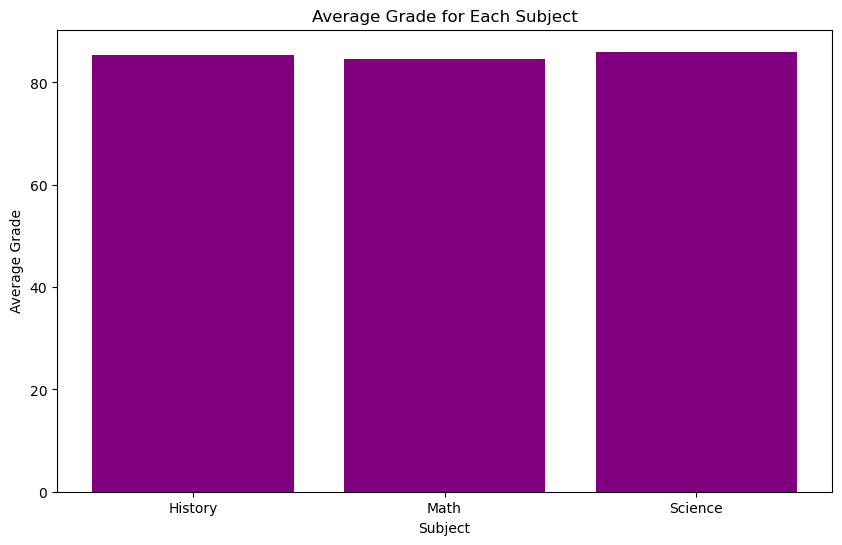

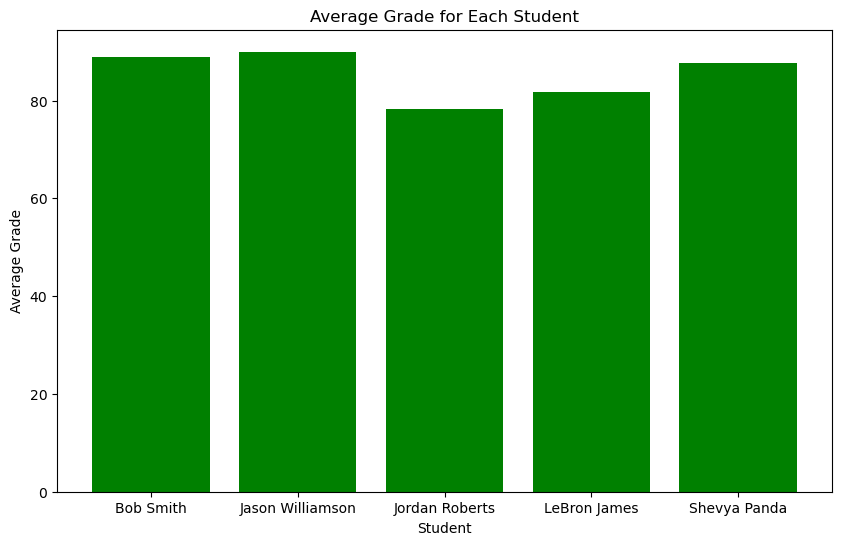

In [204]:
import matplotlib.pyplot as plt

avg_subject_grade = df.groupby('subject')['grade'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_subject_grade['subject'], avg_subject_grade['grade'], color='purple')
plt.title('Average Grade for Each Subject')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.show()

avg_student_grade = df.groupby(['first_name', 'last_name'])['grade'].mean().reset_index()
avg_student_grade['full_name'] = avg_student_grade['first_name'] + ' ' + avg_student_grade['last_name']
plt.figure(figsize=(10, 6))
plt.bar(avg_student_grade['full_name'], avg_student_grade['grade'], color='green')
plt.title('Average Grade for Each Student')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.show()

Bonus Task:
- Implement a query that finds the student with the highest grade in each subject.
- Visualize the results using a grouped bar chart.

In [222]:
cursor.execute('''
SELECT g.subject, s.first_name, s.last_name, g.grade
FROM grades g
JOIN students s ON g.student_id = s.student_id
WHERE g.grade = (
    SELECT MAX(g2.grade)
    FROM grades g2
    WHERE g2.subject = g.subject
);
''')
rows = cursor.fetchall()

for row in rows:
    print(row)

('Math', 'Jason', 'Williamson', 92)
('History', 'Jason', 'Williamson', 90)
('Science', 'Bob', 'Smith', 91)
